### Welcome to the Case Project Notebook on Banking

**Content:**
* The data is related to the direct marketing campaigns of a Portuguese banking institution.
* The marketing campaigns were based on phone calls.
* Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer.
* The dataset contains 45,211 rows and 18 columns, with data collected from May 2008 to November 2010.


**Problem Statement:**
Term deposits are crucial for banks, representing cash investments that accrue interest over a fixed period. To promote these, banks use various strategies including email marketing, advertisements, telephonic marketing, and digital marketing. Despite the advent of digital channels, telephonic marketing remains one of the most effective means of engaging customers. However, it requires substantial investment due to the need for large call centers to execute these campaigns. Therefore, identifying potential customers who are likely to subscribe to term deposits beforehand is essential for targeted outreach.

The *goal* of this project is to predict if a client will subscribe to a term deposit based on data from direct marketing campaigns of a Portuguese banking institution.



In [799]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Exploration:**
   - Load the dataset (`banking_data.csv`) into a DataFrame using Pandas.
   - Exploring the structure of the dataset (number of rows, columns, data types, unique values and recognising patterns for data analysis).

In [800]:
data = pd.read_csv('./banking_data.csv')
# pd.set_option('display.max_columns', None)
data.head(10)

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
5,35,management,married,married,tertiary,no,231,yes,no,unknown,5,may,5-May,139,1,-1,0,unknown,no
6,28,management,single,single,tertiary,no,447,yes,yes,unknown,5,may,5-May,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,divorced,tertiary,yes,2,yes,no,unknown,5,may,5-May,380,1,-1,0,unknown,no
8,58,retired,married,married,primary,no,121,yes,no,unknown,5,may,5-May,50,1,-1,0,unknown,no
9,43,technician,single,single,secondary,no,593,yes,no,unknown,5,may,5-May,55,1,-1,0,unknown,no


In [801]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [802]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000
mean,40.938186,1362.277844,15.806507,258.166202,2.763668,40.202428,0.580657
std,10.621249,3044.609674,8.322022,257.515482,3.097896,100.128248,2.303778
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From this we get a basic idea of the data we are dealing with. We can notice that there is redudant marital and marital_status columns. And comparing with the problem statement there is date_month column, and y can be renamed for clarity. From questions, we get idea of what datsets are necesaary. Now we can proceed with data cleaning and preprocessing before we can proceed to answer furthur questions.

**Data Cleaning and Preprocessing:**
   - Handling missing values if any, using appropriate techniques like imputation or deletion.
   - Converting categorical variables into numerical representations for analysis. (To answer questions in the problem statement)

In [803]:
data['marital'].describe(), data['marital_status'].describe()

(count       45213
 unique          3
 top       married
 freq        27216
 Name: marital, dtype: object,
 count       45213
 unique          3
 top       married
 freq        27216
 Name: marital_status, dtype: object)

In [804]:
#Dropping redudant columns 
data.drop(['marital'], axis = 1, inplace=True)

#Renaming for clarity
data = data.rename(columns={'y': 'subscribed'})

#finding the NaN values in our dataset
missing_values_count = data.isnull().sum()
print(missing_values_count[missing_values_count > 0])

marital_status    3
education         3
dtype: int64


In [805]:
print(data['education'].value_counts())
data['education'] = data['education'].fillna('unknown')

education
secondary    23204
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [806]:
print(data['marital_status'].value_counts())
#As 3 NaN values are insignificant among 45,000 rows, we can drop those rows.
data = data.dropna(subset=['marital_status'])

# data['marital_status'] = data['marital_status'].fillna('married')

marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64


In [807]:
data.isnull().sum()

age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed        0
dtype: int64

We have completed the Data Cleaning Step. Now we can move onto EDA by solving each problem.

##### Question 1: What is the distribution of age among the clients?

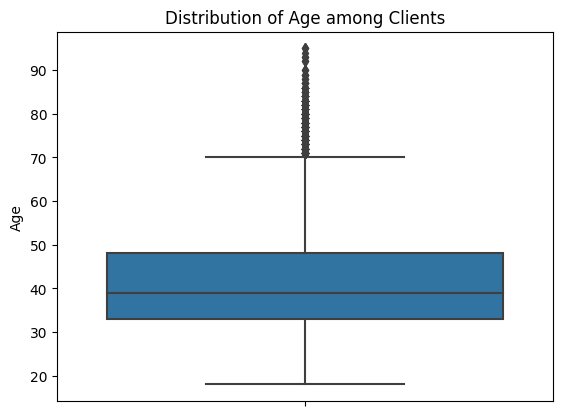

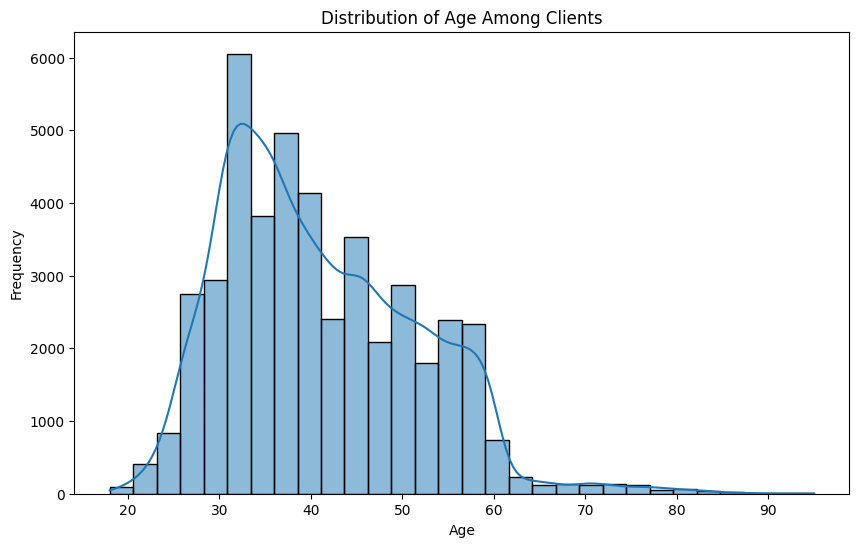

In [808]:
sns.boxplot(y='age', data=data)
plt.title('Distribution of Age among Clients')
plt.ylabel('Age')
plt.show()

# Create a histogram with KDE for the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Distribution of Age Among Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Question 2: How does the job type vary among the clients?

job
blue-collar      9731
management       9460
technician       7597
admin.           5171
services         4154
retired          2266
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: count, dtype: int64


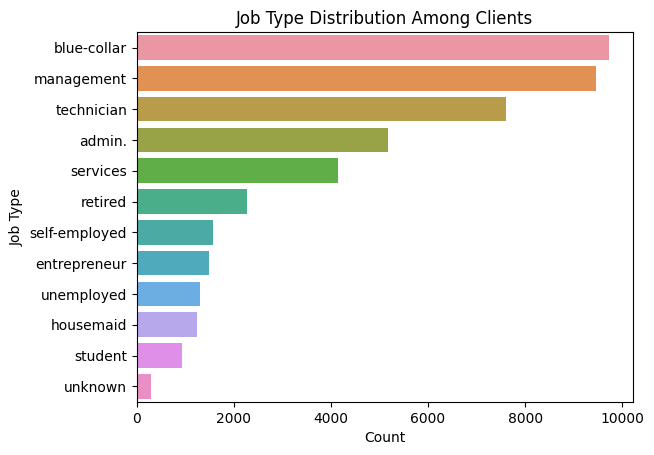

In [809]:
#Numbers
print(data['job'].value_counts())
#Visualization
sns.countplot(y='job', data=data, order=data['job'].value_counts().index)
plt.title('Job Type Distribution Among Clients')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

##### Question 3: What is the marital status distribution of the clients?

The marital status of the clients is as follows: marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64


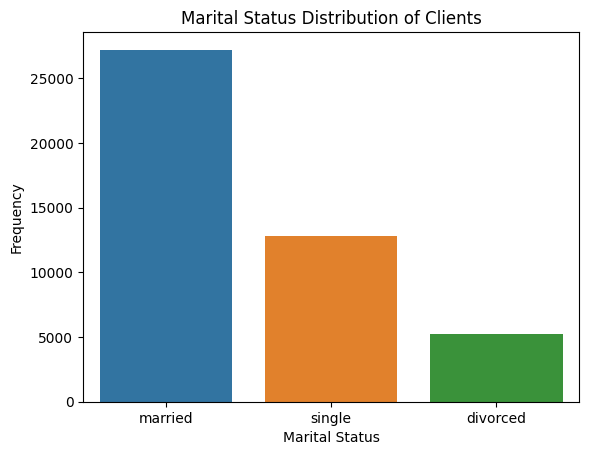

In [810]:
marital_count = data['marital_status'].value_counts()
print(f'The marital status of the clients is as follows: {marital_count}')
sns.countplot(x='marital_status', data=data, order=marital_count.index )
plt.title('Marital Status Distribution of Clients')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

##### Question 4: What is the level of education among the clients?

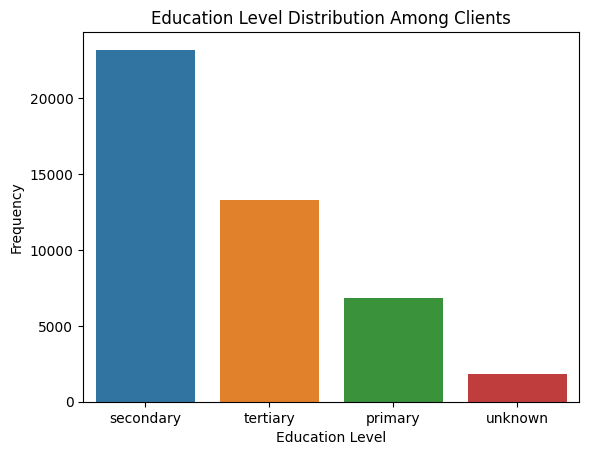

In [811]:
sns.countplot(x='education', data=data, order=data['education'].value_counts().index)
plt.title('Education Level Distribution Among Clients')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

##### Question 5: What proportion of clients have credit in default?

In [812]:
# data['default'].replace({'no':0,'yes':1}, inplace=True)
# print(data['default'].describe())

print(data['default'].value_counts())

# sns.barplot(x=default_count.index, y=default_count.values)
# plt.xlabel('Credit in Default')
# plt.ylabel('Frequency')
# plt.title('Proportion of Clients with Credit in Default')
# plt.show()

default
no     44398
yes      815
Name: count, dtype: int64


##### Question 6: What is the distribution of average yearly balance among the clients?

count     45213.000000
mean       1362.327362
std        3044.702769
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


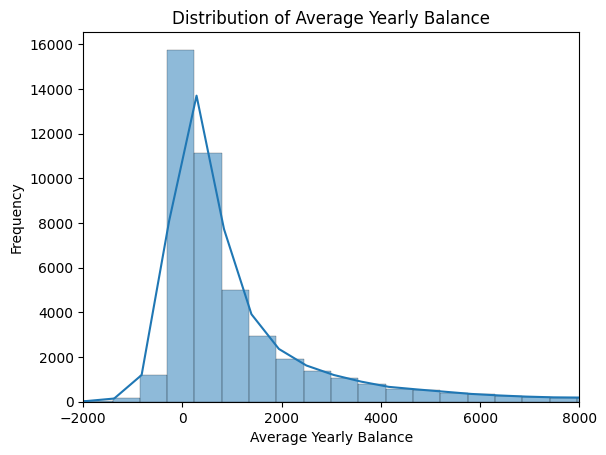

In [813]:
#Numerical
print(data['balance'].describe())

#Representation 
sns.histplot(data['balance'], kde=True, bins= 200)
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Average Yearly Balance')
plt.ylabel('Frequency')
plt.xlim(-2000, 8000)
plt.show()

##### Question 7&8: How many clients have housing loans and personal loans?

In [814]:
print("Number of Clients with Housing Loans:", data['housing'].value_counts(), '\n')
print("Number of Clients with Personal:", data['loan'].value_counts())

Number of Clients with Housing Loans: housing
yes    25130
no     20083
Name: count, dtype: int64 

Number of Clients with Personal: loan
no     37969
yes     7244
Name: count, dtype: int64


##### Question 9: What are the communication types used for contacting clients during the campaign

In [815]:
print("Communication Types Used for Contacting Clients are:", data['contact'].unique())

Communication Types Used for Contacting Clients are: ['unknown' 'cellular' 'telephone']


##### Question 10: What is the distribution of the last contact day of the month?

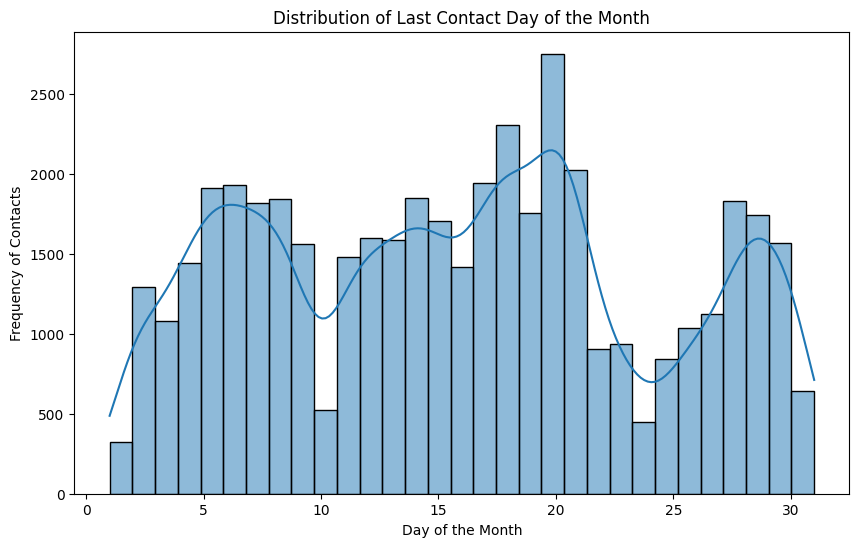

In [816]:
plt.figure(figsize=(10, 6))
sns.histplot(data['day'], kde=True, bins=31)
plt.title('Distribution of Last Contact Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency of Contacts')
plt.show()


##### Question 11: How does the last contact month vary among the clients?

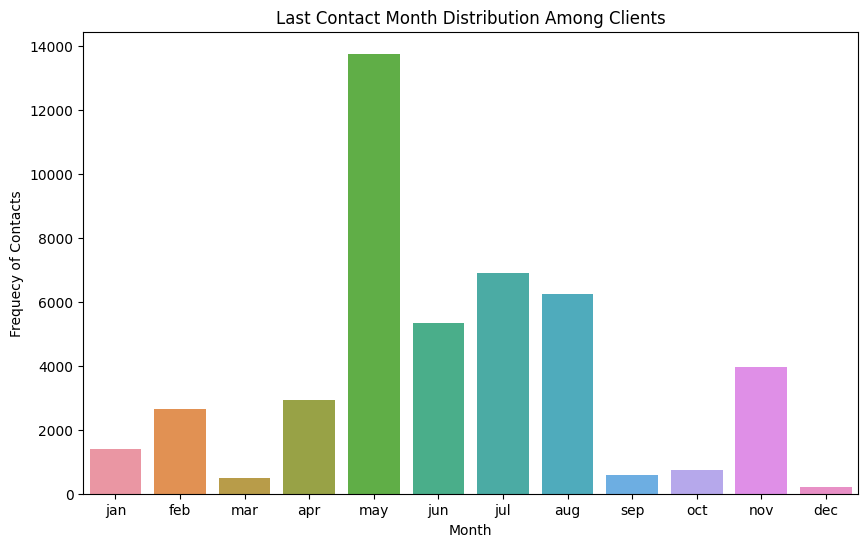

In [817]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Last Contact Month Distribution Among Clients')
plt.xlabel('Month')
plt.ylabel('Frequecy of Contacts')
plt.show()

##### Question 12: What is the distribution of the duration of the last contact?

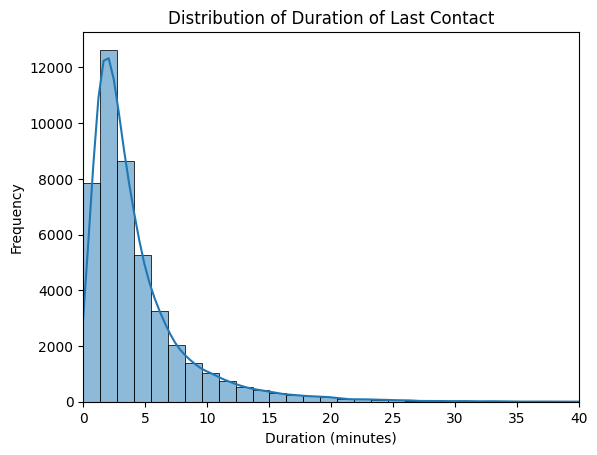

In [818]:
sns.histplot(data['duration']/60, kde=True, bins=60)
plt.title('Distribution of Duration of Last Contact')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 40)
plt.show()

##### Question 13: How many contacts were performed during the campaign for each client?

count    45213.000000
mean         2.763718
std          3.097971
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


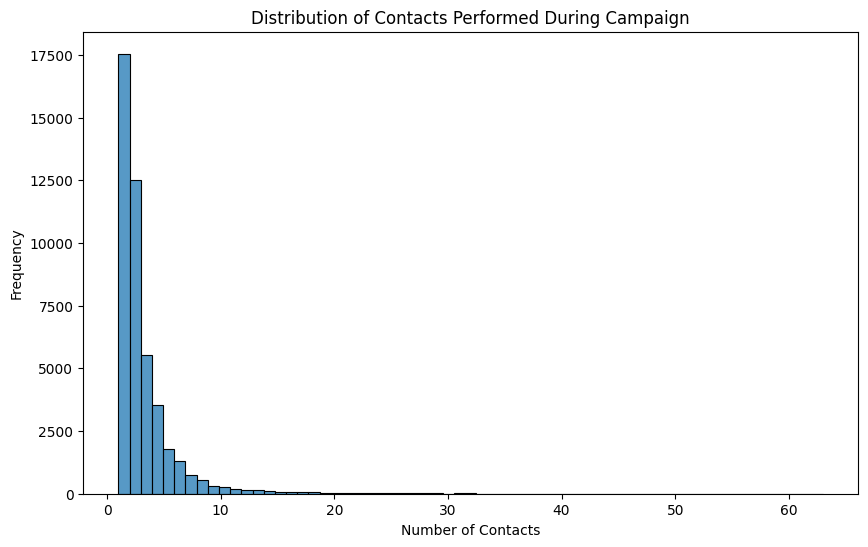

In [819]:
print(data['campaign'].describe())
# print(data['campaign'].value_counts())
plt.figure(figsize=(10, 6))
sns.histplot(data['campaign'], bins=63)
plt.title('Distribution of Contacts Performed During Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
# plt.xlim(0,15)
plt.show()

##### Question 14: What is the distribution of the number of days passed since the client was last contacted from a previous campaign?

count    45213.000000
mean        40.191582
std        100.112324
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


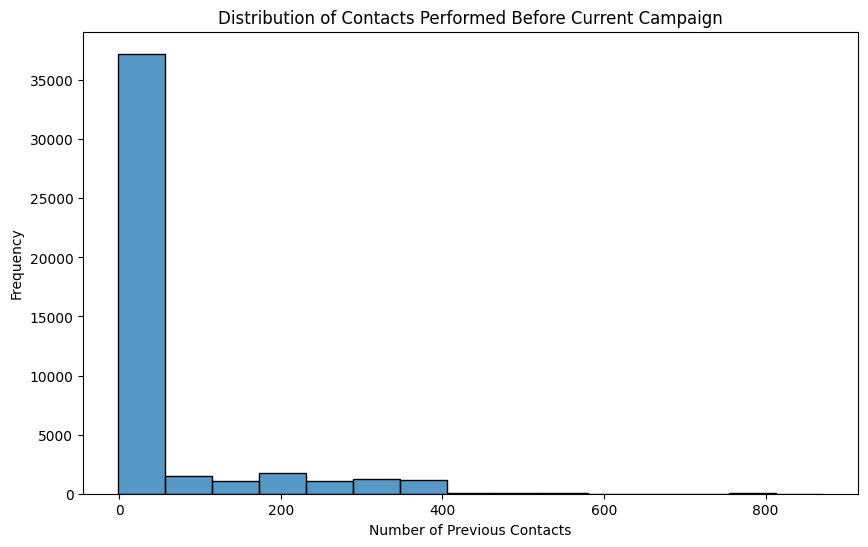

In [820]:
print(data['pdays'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(data['pdays'], bins=15)
plt.title('Distribution of Contacts Performed Before Current Campaign')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Frequency')
plt.show()

##### Question 15: How many contacts were performed before the current campaign for each client?

In [821]:
df = pd.DataFrame(data['previous'].value_counts())
# df.rename(columns={'' : 'No.of Previous Contacts', 'count' : 'Client Count'}, inplace=True)
print(df)
# plt.figure(figsize=(10, 6))
# sns.histplot(data['previous'], kde=True, bins=30)
# plt.title('Distribution of Contacts Performed Before Current Campaign')
# plt.xlabel('Number of Previous Contacts')
# plt.ylabel('Frequency')
# plt.show()

          count
previous       
0         36955
1          2772
2          2105
3          1142
4           714
5           459
6           278
7           205
8           130
9            92
10           67
11           65
12           44
13           38
15           20
14           19
17           15
16           13
19           11
20            8
23            8
18            6
22            6
24            5
27            5
21            4
29            4
25            4
30            3
38            2
37            2
26            2
28            2
51            1
275           1
58            1
32            1
40            1
55            1
35            1
41            1


##### Question 16: What were the outcomes of the previous marketing campaigns?

The campaign was success for:  1513


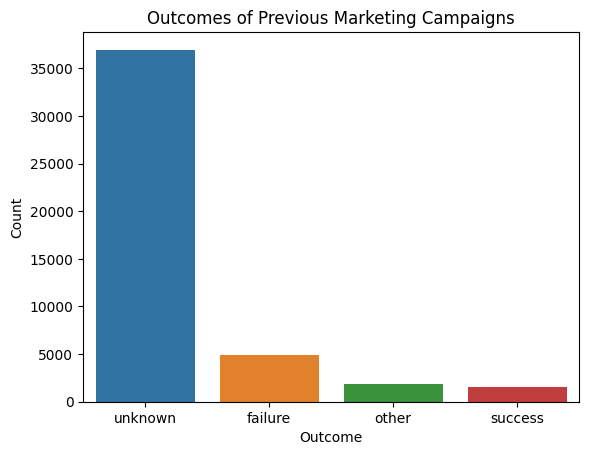

In [822]:

sns.countplot(x='poutcome', data=data, order=data['poutcome'].value_counts().index)
plt.title('Outcomes of Previous Marketing Campaigns')
plt.xlabel('Outcome')
plt.ylabel('Count')
print("The campaign was success for: ", data['poutcome'].value_counts()['success'])
plt.show()

##### Question 17: What is the distribution of clients who subscribed to a term deposit vs. those who did not?

Number of clients who subscribed for a term deposit :  5294
Number of clients who didn't subscribe:  39919


(-1.0999998708065613,
 1.0999998282656305,
 -1.0999999474471394,
 1.0999999074076228)

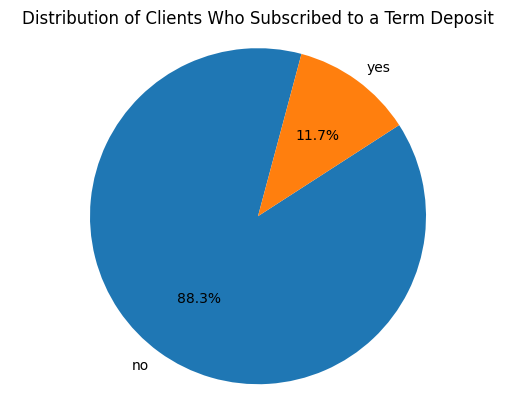

In [823]:
subscription_counts = data['subscribed'].value_counts()
print("Number of clients who subscribed for a term deposit : ", subscription_counts["yes"])
print("Number of clients who didn't subscribe: ", subscription_counts["no"])
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=75)
plt.title('Distribution of Clients Who Subscribed to a Term Deposit')
plt.axis('equal')

##### Question 18: Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

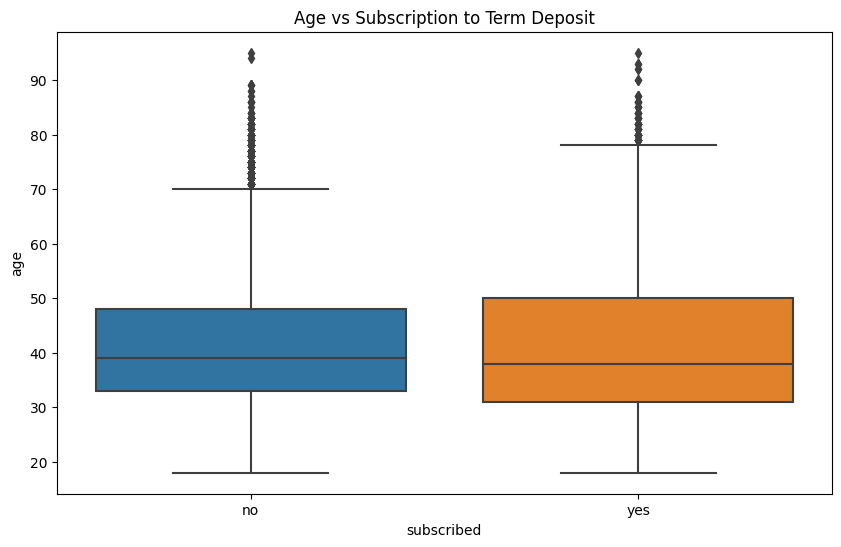

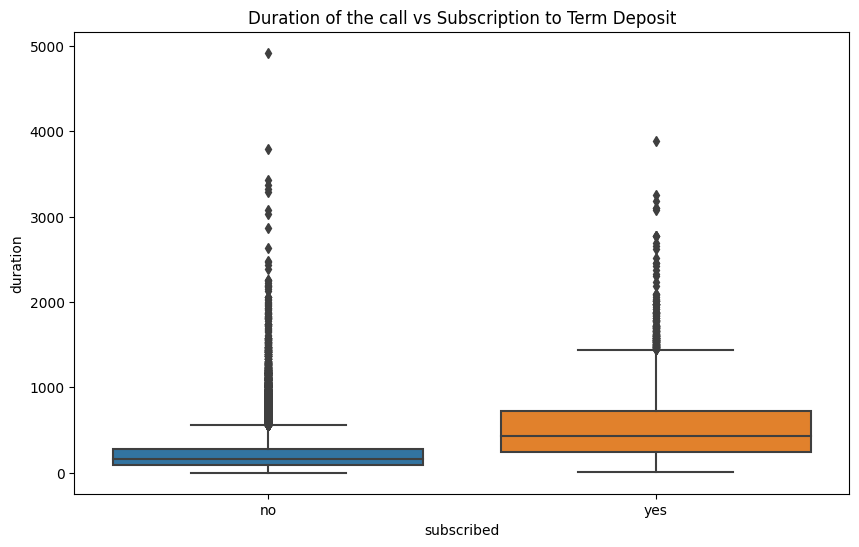

In [824]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='subscribed', y='age', data=data)
plt.title('Age vs Subscription to Term Deposit')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='subscribed', y='duration', data=data)
plt.title('Duration of the call vs Subscription to Term Deposit')
plt.show()

In [825]:
#data.dtypes
#print(data['contact'].value_counts())

In [826]:
data['subscribed'].replace({'yes': 1, 'no': 0}, inplace=True)
data['contact'].replace({'cellular': 2, 'telephone': 1, 'unknown': 0}, inplace=True)
# data['loan'].replace({'yes': 1, 'no': 0}, inplace=True)
# data['housing'].replace({'yes': 1, 'no': 0}, inplace=True)
data['education'].replace({'tertiary': 3, 'primary': 1, 'secondary': 2, 'unknown': 0}, inplace=True)
data['poutcome'].replace({'success': 1, 'failure': -1, 'other': -1, 'unknown': 0}, inplace=True)
data['marital_status'].replace({'married': 1, 'divorced': -1, 'single': 0}, inplace=True)
data['month'].replace({'jan': 1, 'feb': 2, 'mar' : 3, 'apr': 4, 'may' : 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace=True)

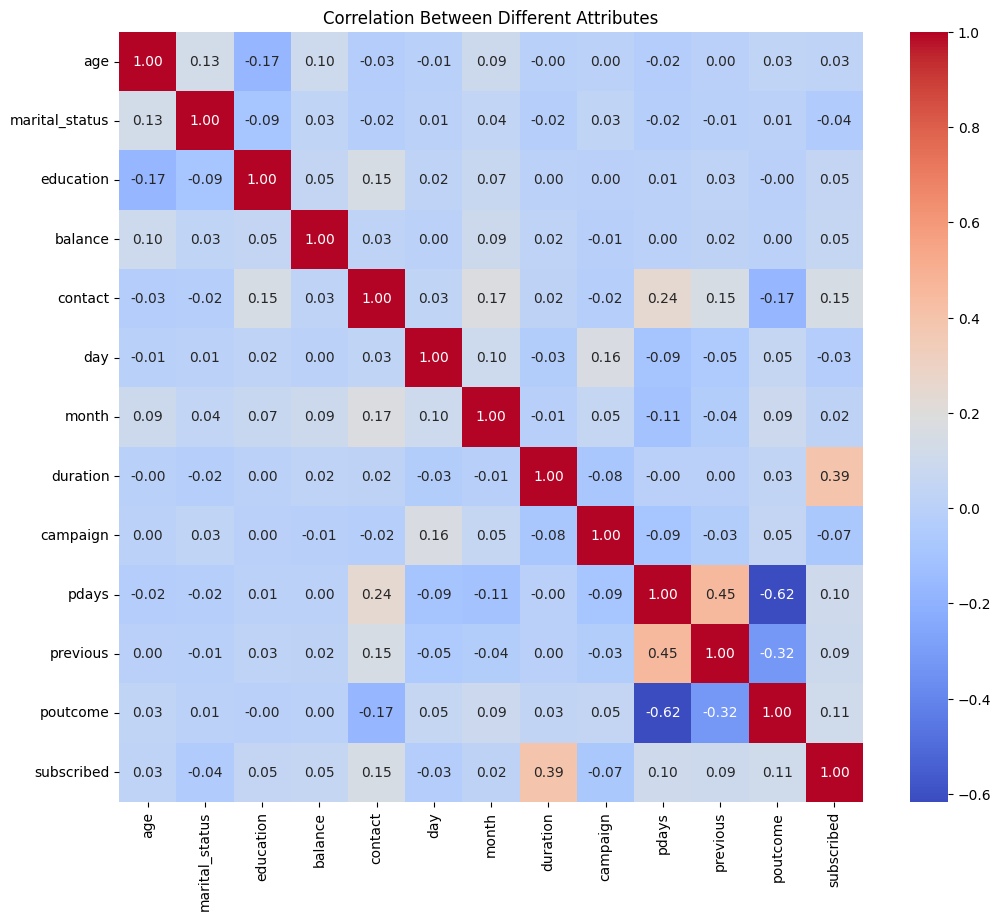

In [827]:
numeric_data = data.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 10))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Different Attributes')
plt.show()